In [1]:
# Importing pandas
import pandas as pd

In [2]:
# Read file
encoding_used = "ISO-8859-1" # character encoding
df=pd.read_csv("dataset.csv", encoding = encoding_used)

In [3]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
# naming the column
data_columns  = ["target", "ids", "date", "flag", "user", "text"]
encoding_used = "ISO-8859-1"

df = pd.read_csv("dataset.csv", encoding = encoding_used, names = data_columns )
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# Exploratory Data Analysis

In [5]:
target_group = df.groupby('target').count()['text']
target_group

target
0    800000
4    800000
Name: text, dtype: int64

[Text(0, 0, 'Negative'), Text(1, 0, 'Positive')]

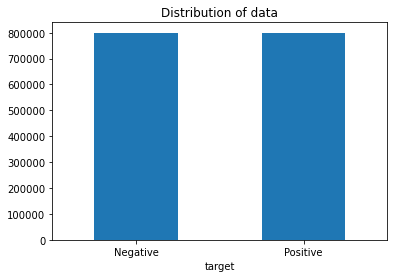

In [6]:
# Plotting the distribution for dataset.
ax = target_group.plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation = 0)

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

This means we only have negative and positive labels.

I will change all positive labels to 1 i.e all 4 == 1

# Keeping only relevant values 

In [7]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [8]:
data = df[['target', 'text']]
data.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Renaming Column

In [9]:
data.columns = ["sentiment", "text"]
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


# Replacing value

In [10]:
data[data['sentiment'] != 0].head()

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


In [11]:
data['sentiment'] = data['sentiment'].replace(4,1)

<ipython-input-11-85226499ea73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['sentiment'].replace(4,1)


In [12]:
#Confirming 4 == 1
data[data['sentiment'] != 0].head()

,sentiment,text
800000,1,I LOVE @Health4UandPets u guys r the best!!
800001,1,im meeting up with one of my besties tonight! ...
800002,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,Being sick can be really cheap when it hurts t...
800004,1,@LovesBrooklyn2 he has that effect on everyone


# Finding the missing values

In [13]:
data.isnull().sum()

sentiment    0
text         0
dtype: int64

# Converting data to a list data structure

In [14]:
text, sentiment = list(data['text']), list(data['sentiment'])

# Checking Output of Data Structure

In [15]:
text[0:16]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing ",
 'I just re-pierced my ears ',
 "@caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . .",
 '@octolinz16 It it counts, idk why I did either. you never talk to me anymore ',
 "@smarrison i wo

In [16]:
sentiment[0:16]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Preprocess Text
Defining Emojis and their meanings

In [17]:
# Natural Language Toolkit (nltk)
from nltk.stem import WordNetLemmatizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lipik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lipik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

Defining Stop words in English

In [19]:
mystopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
english_stop_words =  stopwords.words('english')
english_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [21]:
stopwordlist = stopwords.words('english') + mystopwordlist

# Preprocesing Function

In [22]:
def preprocess(textdata):
    processedText = []
    
    #creating a Lemmatizer
    wordLemma = WordNetLemmatizer() #define the imported library
    
    # Defining regular expression pattern we can find. in tweets
    
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" # e.g check out https://dot.com for more
    userPattern       = '@[^\s]+' # e.g @FagbamigbeK check this out
    alphaPattern      = "[^a-zA-Z0-9]" # e.g I am *10 better!
    sequencePattern   = r"(.)\1\1+"  # e.g Heyyyyyyy, I am back!
    seqReplacePattern = r"\1\1" # e.g Replace Heyyyyyyy with Heyy
    
    
    for tweet in textdata:
        tweet = tweet.lower() #normalizing all text to a lower case
        
        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet) #using the substitution method of the regular expression library
        
        
        # Replace all emojis.
        for emoji in emojis.keys(): #in each of the looped tweet, replace each emojis with their respective meaning
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])  # emojis[emoji] helps to get the value of the emoji from the dictionary
            
            
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)  #To hide Personal Information, we can replace all usernames with User
        
        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet) # e.g I am *10 better!
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet) # e.g Replace Heyyyyyyy with Heyy
        
        
        tweetwords = ''
        for word in tweet.split():
            if len(word) > 2 and word.isalpha():
                word = wordLemma.lemmatize(word)
                tweetwords += (word + ' ')
        
        processedText.append(tweetwords)
        
    return processedText

# Noting the time text preprocessing took

In [23]:
# utilities
import re
import pickle
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [24]:
# Natural Language Toolkit (nltk)
from nltk.stem import WordNetLemmatizer
from nltk import download
download('stopwords')
download('wordnet')
from nltk.corpus import stopwords

# Model Buildig (sklearn)
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#Data Splitting and Traininig
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lipik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lipik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
import time
t = time.time()
preprocessedtext = preprocess(text) #the preprocess function at work
print(f'Text Processing Done.')
print(f'Time taken for text processing: {round(time.time()-t)} seconds')

Text Processing Done.
Time taken for text processing: 155 seconds


# Analysing the data
Now we're going to analyse the preprocessed data to get an understanding of it. We'll plot Word Clouds for Positive and Negative tweets from our dataset and see which words occur the most.

Before Processing

In [26]:
text[0:11]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ',
 "spring break in plain city... it's snowing "]

After Processing

In [27]:
preprocessedtext[0:11]

['USER URL aww that bummer you shoulda got david carr third day EMOJIwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 'USER dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 'USER not behaving all mad why here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have ',
 'USER que muera ',
 'spring break plain city snowing ']

In [28]:
negative_sentiments = preprocessedtext[:800000]
negative_sentiments[0:10]

['USER URL aww that bummer you shoulda got david carr third day EMOJIwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 'USER dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 'USER not behaving all mad why here because can see you all over there ',
 'USER not the whole crew ',
 'need hug ',
 'USER hey long time see yes rain bit only bit lol fine thanks how you ',
 'USER nope they didn have ',
 'USER que muera ']

In [29]:
data_neg = []
for words in negative_sentiments:
    words = words.lower().replace("user","")
    words = words.lower().replace("url","")
    data_neg.append(words)
    
data_neg[0:10]

['  aww that bummer you shoulda got david carr third day emojiwink ',
 'upset that can update his facebook texting and might cry result school today also blah ',
 ' dived many time for the ball managed save the rest out bound ',
 'whole body feel itchy and like it fire ',
 ' not behaving all mad why here because can see you all over there ',
 ' not the whole crew ',
 'need hug ',
 ' hey long time see yes rain bit only bit lol fine thanks how you ',
 ' nope they didn have ',
 ' que muera ']

In [30]:
word_cloud = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False)

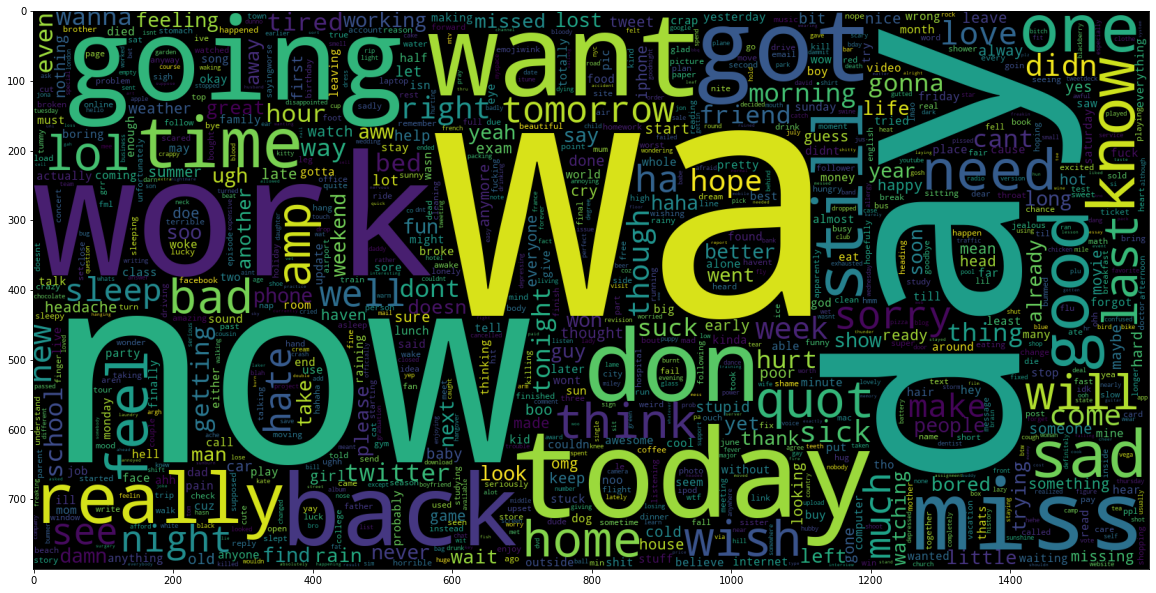

In [31]:
plt.figure(figsize = (20,20))
negative_wc = word_cloud.generate(" ".join(data_neg))
plt.imshow(negative_wc)

# Word-Cloud for Positive tweets

In [32]:
positive_sentiments = preprocessedtext[800000:]
positive_sentiments[0:10]

['love USER guy the best ',
 'meeting with one besties tonight cant wait girl talk ',
 'USER thanks for the twitter add sunisa got meet you once hin show here the area and you were sweetheart ',
 'being sick can really cheap when hurt too much eat real food plus your friend make you soup ',
 'USER ha that effect everyone ',
 'USER you can tell him that just burst out laughing really loud because that thanks for making come out sulk ',
 'USER thans for your response ihad already find this answer ',
 'USER jealous hope you had great time vega how did you like the acm love your show ',
 'USER congrats fletcher for finally joining twitter ',
 'USER responded stupid cat helping type forgive error ']

In [33]:
data_pos = []
for words in positive_sentiments:
    words = words.lower().replace("user","")
    words = words.lower().replace("url","")
    data_pos.append(words)
    
data_pos[0:10]

['love  guy the best ',
 'meeting with one besties tonight cant wait girl talk ',
 ' thanks for the twitter add sunisa got meet you once hin show here the area and you were sweetheart ',
 'being sick can really cheap when hurt too much eat real food plus your friend make you soup ',
 ' ha that effect everyone ',
 ' you can tell him that just burst out laughing really loud because that thanks for making come out sulk ',
 ' thans for your response ihad already find this answer ',
 ' jealous hope you had great time vega how did you like the acm love your show ',
 ' congrats fletcher for finally joining twitter ',
 ' responded stupid cat helping type forgive error ']

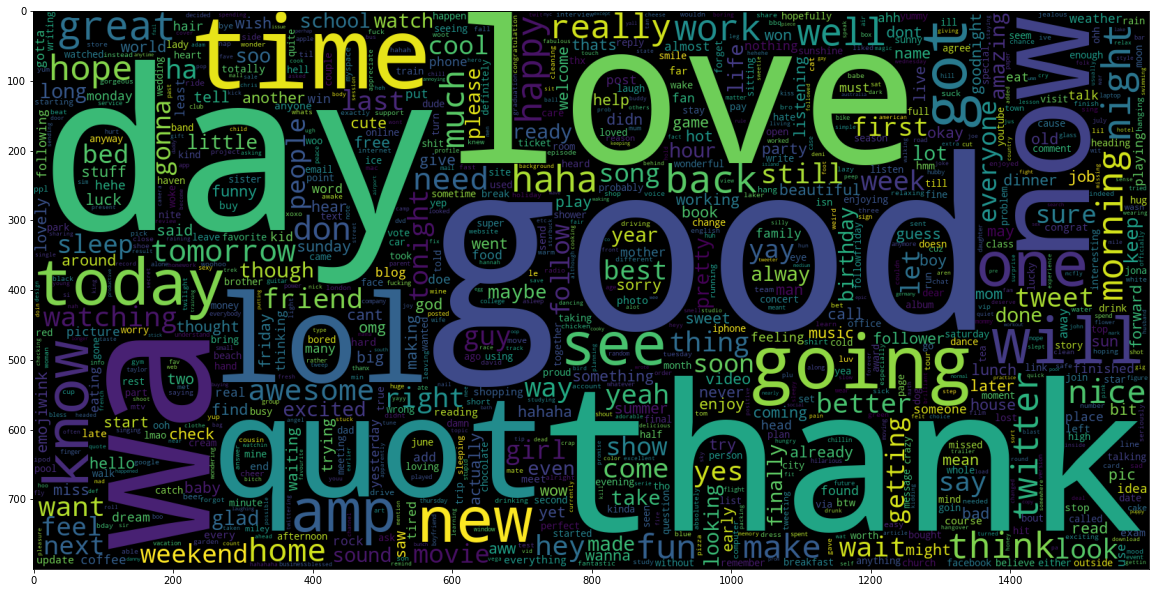

In [34]:
plt.figure(figsize = (20,20))
positive_wc = word_cloud.generate(" ".join(data_pos))
plt.imshow(positive_wc)

# Tranforming the dataset
Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(preprocessedtext, sentiment,test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


# TF-IDF Vectoriser

In [36]:
vectoriser = TfidfVectorizer(ngram_range=(1,2),stop_words = stopwordlist, strip_accents = 'unicode', max_features = 500000)
vectoriser.fit(X_train) #fit the training data
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


# Tranforming the dataset
Transforming the X_train and X_test dataset into matrix of TF-IDF Features by using the TF-IDF Vectoriser. This datasets will be used to train the model and test against it.

In [37]:
#transform the training and test data
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


# Creating and Evaluating Models

In [38]:
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test) #Xtest is not used in model training

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos'] #configuration of a confusin matrix
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)] #converting confusion matrix value to percentage in 2 decimal places.

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

### LinearSVC Model

              precision    recall  f1-score   support

           0       0.79      0.77      0.78     39989
           1       0.77      0.80      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



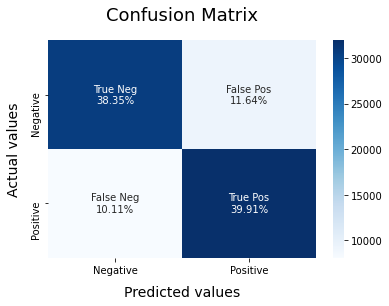

In [39]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

# Accuracy: 78%

### Logistic Regression Model

              precision    recall  f1-score   support

           0       0.81      0.78      0.79     39989
           1       0.79      0.81      0.80     40011

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



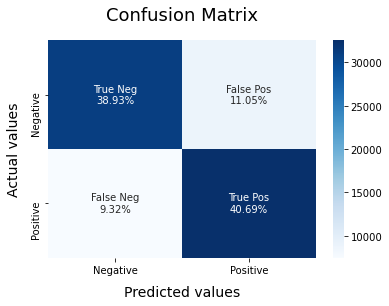

In [40]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)

# Accuracy: 80%

### Naive Bayes Model

              precision    recall  f1-score   support

           0       0.79      0.78      0.78     39989
           1       0.78      0.79      0.79     40011

    accuracy                           0.78     80000
   macro avg       0.78      0.78      0.78     80000
weighted avg       0.78      0.78      0.78     80000



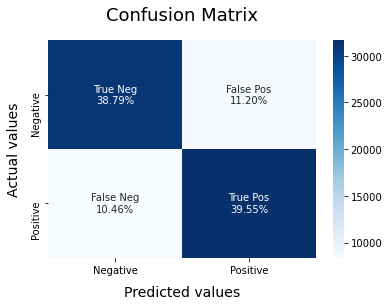

In [41]:
from sklearn.naive_bayes import MultinomialNB
NBClassifier_model = MultinomialNB()
NBClassifier_model.fit(X_train, y_train)
model_Evaluate(NBClassifier_model)

# Accuracy: 78%

In [42]:
# LinearSVC Model: 78%
# Logistic Regression Model: 80%
# Logistic Regression Model: 78%